<img src="zona_jobs.png">

# Importo librerias necesarias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Lectura de archivos

In [49]:
usuarios_educacion   = pd.read_csv('../data/fiuba_1_postulantes_educacion.csv', dtype = {
    'nombre': 'category',
    'estado': 'category'
})
usuarios_sexo_y_edad = pd.read_csv('../data/fiuba_2_postulantes_genero_y_edad.csv', dtype = {
    'sexo': 'category'    
}) 
avisos_detalles      = pd.read_csv('../data/fiuba_6_avisos_detalle.csv', dtype= {                                                                            'nombre_zona': 'category',
    'ciudad': 'category',
    'tipo_de_trabajo': 'category',
    'nivel_laboral': 'category',
    'nombre_area': 'category'
})
avisos_visitas       = pd.read_csv('../data/fiuba_3_vistas.csv', parse_dates=['timestamp'])
avisos_postulaciones = pd.read_csv('../data/fiuba_4_postulaciones.csv', parse_dates=['fechapostulacion'])

# Merges necesarios 

In [68]:
usuarios_detalle                          = pd.merge(usuarios_educacion          , usuarios_sexo_y_edad, how='inner', left_on='idpostulante', right_on='idpostulante')
postulaciones_a_avisos_con_su_detalle     = pd.merge(avisos_postulaciones        , avisos_detalles     , how='inner', left_on='idaviso'     , right_on='idaviso')
visitas_con_detalle_de_aviso              = pd.merge(avisos_visitas              , avisos_detalles     , how='inner', left_on='idAviso'     , right_on='idaviso')
visitas_con_detalle_de_aviso_y_usuario    = pd.merge(visitas_con_detalle_de_aviso, usuarios_detalle    , how='inner', left_on='idpostulante', right_on='idpostulante')

# Cantidad de avisos en los diferentes niveles laborales

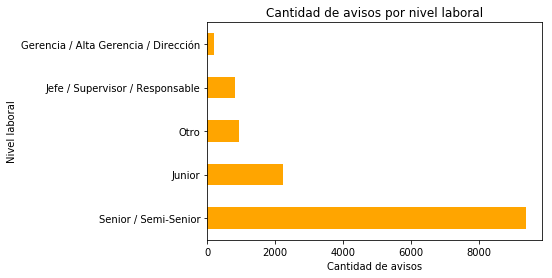

In [60]:
ax = plt.gca()
avisos_detalles.groupby('nivel_laboral')['nivel_laboral'].count().sort_values(ascending=False)\
               .plot(kind='barh', color="orange", title="Cantidad de avisos por nivel laboral");
ax.set_xlabel('Cantidad de avisos')
ax.set_ylabel('Nivel laboral');

# Cuales son las areas laborales con mayor cantidad de avisos?

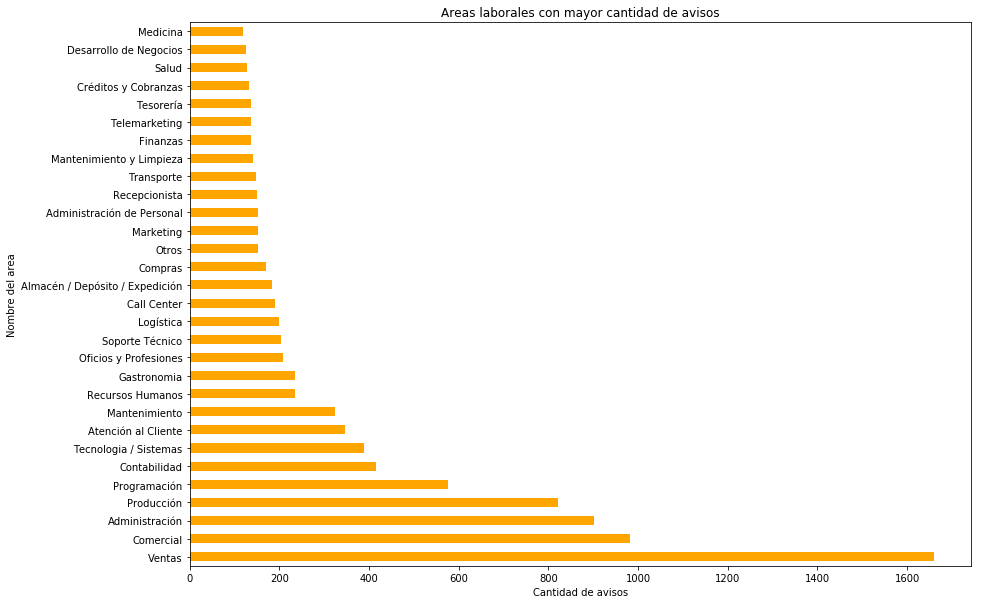

In [61]:
ax = plt.gca()
avisos_detalles.groupby('nombre_area')['nombre_area'].count().sort_values(ascending=False).head(30)\
               .plot(kind='barh', color='orange',figsize=(14,10), title="Areas laborales con mayor cantidad de avisos");
ax.set_xlabel('Cantidad de avisos');
ax.set_ylabel('Nombre del area');

# Cuales son las areas laborales con menor cantidad de avisos?

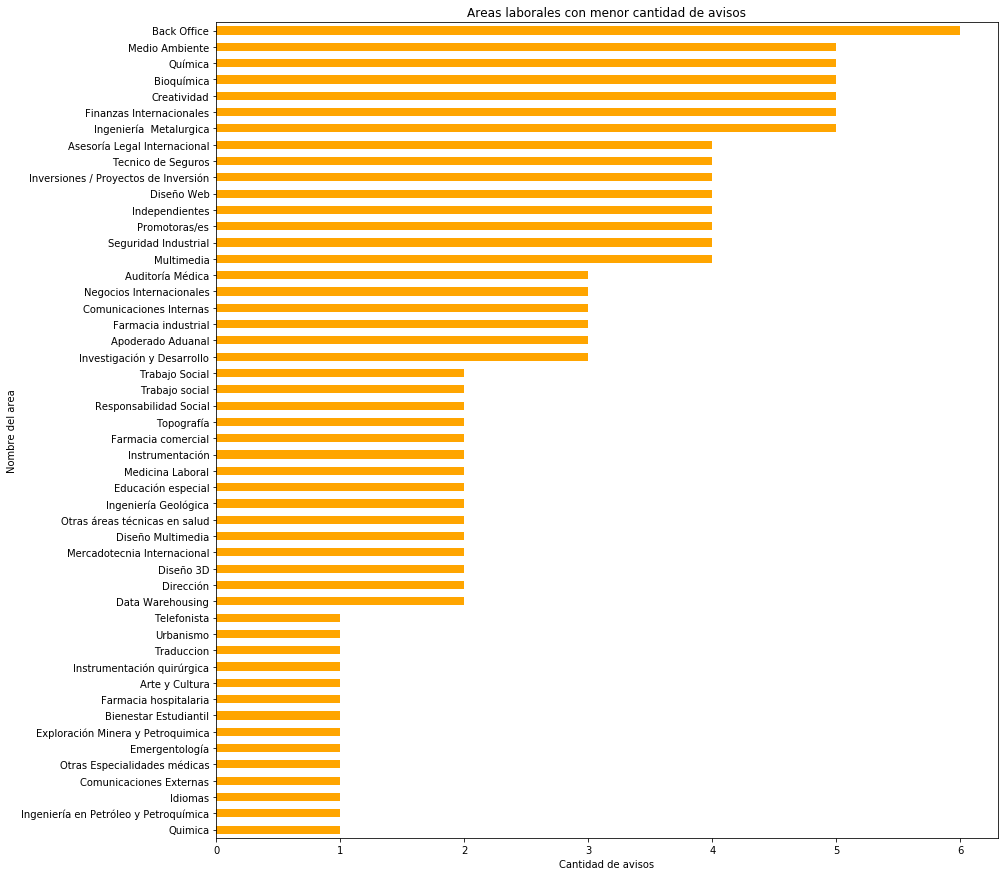

In [62]:
ax = plt.gca()
avisos_detalles.groupby('nombre_area')['nombre_area'].count().sort_values(ascending=True).head(50)\
               .plot(kind='barh', figsize=(14,15), color='orange', title='Areas laborales con menor cantidad de avisos');
ax.set_xlabel('Cantidad de avisos');
ax.set_ylabel('Nombre del area');

# Cuales son las areas laborales con mayor cantidad de postulaciones?

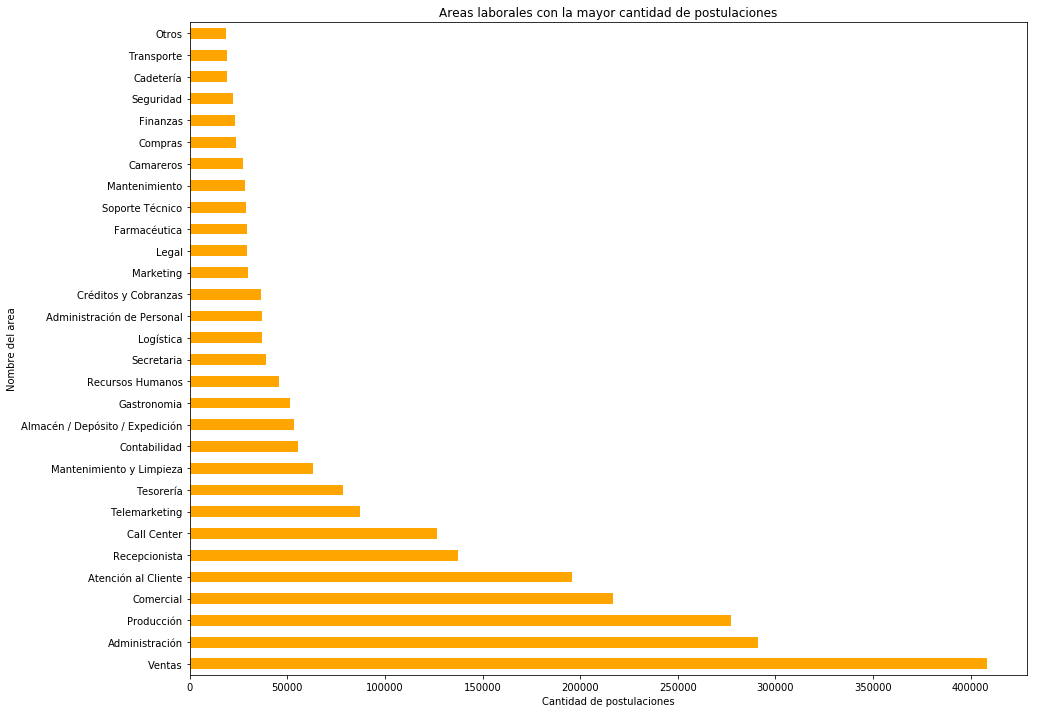

In [63]:
ax = plt.gca()
postulaciones_a_avisos_con_su_detalle.groupby('nombre_area')['nombre_area'].count().sort_values(ascending=False).head(30)\
                                     .plot(kind='barh', figsize=(15,12), color='orange', title='Areas laborales con la mayor cantidad de postulaciones');
ax.set_xlabel('Cantidad de postulaciones');
ax.set_ylabel('Nombre del area');

# Cuales son las areas laborales con menor cantidad de postulaciones?

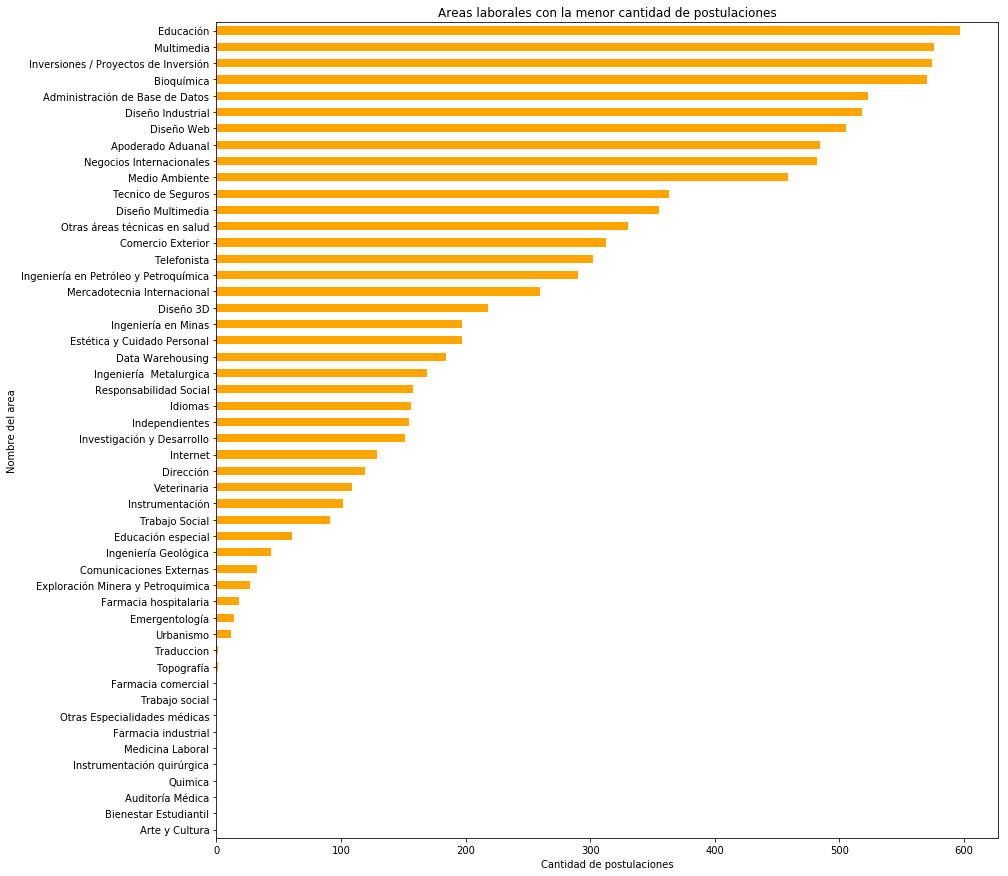

In [64]:
ax = plt.gca()
postulaciones_a_avisos_con_su_detalle.groupby('nombre_area')['nombre_area'].count().sort_values(ascending=True).head(50)\
                                     .plot(kind='barh', figsize=(14,15), color='orange', title='Areas laborales con la menor cantidad de postulaciones');
ax.set_xlabel('Cantidad de postulaciones');
ax.set_ylabel('Nombre del area');

# Que tipos de trabajo buscan los estudiantes universitarios?

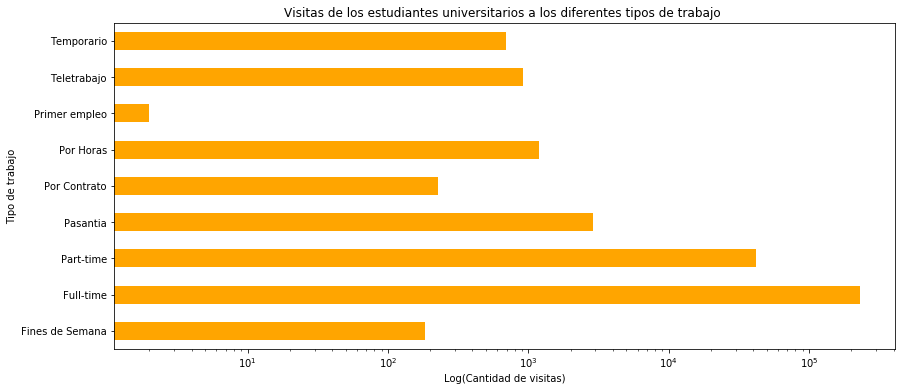

In [108]:
ax = plt.gca()
(visitas_con_detalle_de_aviso_y_usuario[                                          \
    (visitas_con_detalle_de_aviso_y_usuario.estado == 'En Curso'     ) &           
    (visitas_con_detalle_de_aviso_y_usuario.nombre == 'Universitario')              
])                                                                                \
        .groupby(['tipo_de_trabajo'])['idaviso'].count()\
        .plot(kind='barh', color='orange', figsize=(14,6), logx=True, title='Visitas de los estudiantes universitarios a los diferentes tipos de trabajo ')

ax.set_xlabel('Log(Cantidad de visitas)');
ax.set_ylabel('Tipo de trabajo');